In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,8)
warnings.filterwarnings("ignore")

In [2]:
#Reading the data 
Audi_set = pd.read_csv("audi.csv")
Audi_set.head() # checking the first five rows of data to see what it looks like

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


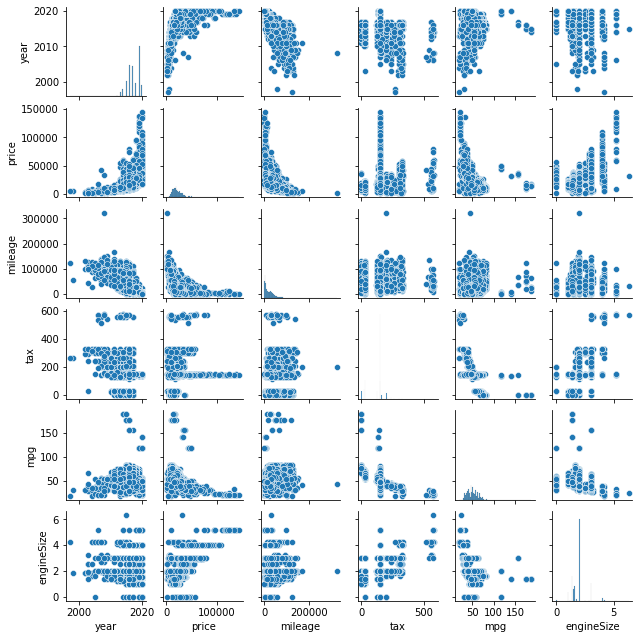

In [4]:
sns.pairplot(Audi_set, height=1.5)

In [3]:
Audi_set.shape # checking the shape of the dataset (No of rows by column)

(10668, 9)

In [4]:
# Checking the number of models in the dataset, their values and sorting them in descending order
model_stat = Audi_set.groupby('model')['model'].agg('count').sort_values(ascending=False)
model_stat

model
 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

In [5]:
len(Audi_set['model'].unique()) # Getting the total number of all the models in our dataset

26

In [6]:
Audi_set['transmission'].unique() # Checking the unique values in transmission

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [7]:
Audi_set['year'].unique() # Checking unique values of year column

array([2017, 2016, 2019, 2015, 2014, 2018, 2013, 2020, 2004, 2009, 2012,
       2010, 2007, 2011, 2008, 2003, 2005, 2002, 2006, 1998, 1997],
      dtype=int64)

In [8]:
len(Audi_set['year'].unique()) # Getting the total number of years in the dataset 

21

In [9]:
Audi_set['engineSize'].unique() # Checking the unique values to check for errors or non-uniformity in enginesize column

array([1.4, 2. , 1. , 3. , 1.6, 1.8, 1.5, 4. , 2.5, 1.2, 4.2, 2.9, 5.2,
       1.9, 2.7, 0. , 3.2, 4.1, 6.3])

In [10]:
Audi_set.isnull().sum() # Checking for total number of null values and zeros in the dataset

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [11]:
Audi_set.price.describe() # Getting the de

count     10668.000000
mean      22896.685039
std       11714.841888
min        1490.000000
25%       15130.750000
50%       20200.000000
75%       27990.000000
max      145000.000000
Name: price, dtype: float64

In [12]:
Audi_set1 = Audi_set.copy() # making a new dataframe, which is a copy of the original dataframe
Audi_set1['tax_per_price'] = Audi_set['tax']/Audi_set['price'] # Calculating the tax paid per price of car 
Audi_set1.head() # printing the first five rows

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax_per_price
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,0.012000
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,0.001212
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,0.002727
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,0.008631
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,0.008382


In [13]:
model_less_than_10 = model_stat[model_stat<=10] # Checking for the number of models that that have less than 10 values
model_less_than_10

model
 SQ7    8
 S8     4
 S5     3
 A2     1
 RS7    1
Name: model, dtype: int64

In [14]:
 # Putting together as others all the models less than 10 to reduce dimensionality
Audi_set1.model  = Audi_set1.model.apply(lambda x: 'other' if x in model_less_than_10 else x)
len(Audi_set1.model.unique())  # Getting the length of the model after creating others

22

In [15]:
Audi_set1.model.unique() # Now checking the unique values of models after creating 'others' model 

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', 'other', ' S3'], dtype=object)

In [16]:
Audi_set1.tax_per_price.describe() # A basic statistics of the tax per price of car shows minimum values to be zero which is an error

count    10668.000000
mean         0.006268
std          0.006957
min          0.000000
25%          0.003014
50%          0.005577
75%          0.007689
max          0.185403
Name: tax_per_price, dtype: float64

In [17]:
Audi_set1[Audi_set1.tax_per_price == 0.00].head() #Checking the dataframe for rows where the tax per price is zero

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax_per_price
30,A1,2015,9500,Automatic,54754,Diesel,0,76.3,1.6,0.0
50,A4,2016,12750,Manual,52561,Diesel,0,74.3,2.0,0.0
58,A3,2016,10200,Manual,66369,Diesel,0,83.1,1.6,0.0
60,A1,2013,7000,Manual,76269,Diesel,0,74.3,1.6,0.0
69,A1,2016,10800,Manual,18181,Petrol,0,67.3,1.0,0.0


In [18]:
len(Audi_set1[Audi_set1.tax_per_price == 0.00]) # Getting the total number of rows where tax per price is zero

536

In [19]:
Audi_set2 = Audi_set1[~(Audi_set1.tax_per_price == 0.00)] #Creating a new dataframe whilst dropping the rows where tax per price is zero
Audi_set2.shape # Gettin the shape of our new dataframe

(10132, 10)

In [20]:
Audi_set2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax_per_price
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,0.012000
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,0.001212
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,0.002727
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,0.008631
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,0.008382


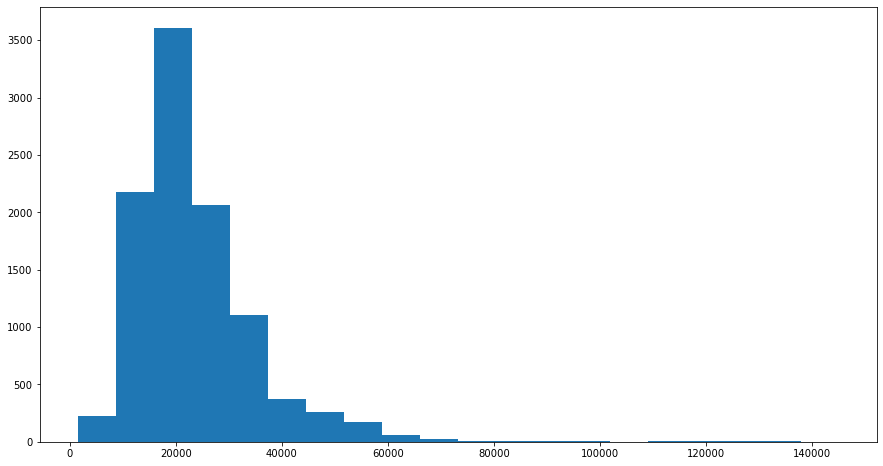

In [21]:
# plotting a distribution of the price with a bin of 20, it shows an almost normal distribution 
plt.hist(Audi_set2.price, 20)
plt.show()

In [22]:
Audi_set2.price.describe() # A basic statistics of price to check the minimum and maximum values and standard deviation after cleaning

count     10132.000000
mean      23521.049941
std       11677.715192
min        1490.000000
25%       15998.000000
50%       20990.000000
75%       28490.000000
max      145000.000000
Name: price, dtype: float64

In [23]:
Audi_set2.tax.describe() # A basic statistics of tax to check the minimum and maximum values and standard deviation after cleaning

count    10132.000000
mean       132.677655
std         62.177253
min         20.000000
25%        145.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64

In [24]:
Audi_set2.tax_per_price.describe() # A basic statistics of tax per price to check the minimum and maximum values and standard deviation after cleaning

count    10132.000000
mean         0.006600
std          0.006984
min          0.000871
25%          0.003671
50%          0.005800
75%          0.007840
max          0.185403
Name: tax_per_price, dtype: float64

In [25]:
Audi_set3 = Audi_set2.drop(['tax_per_price'], axis= 'columns') # Droppig columns not needed for our prediction and reading it into a new dataframe
Audi_set3.head() #Viewing the first five rows of our dataframe after dropping the unwanted column

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [26]:
# Converting the categorical columns to numerical columns by doing one-hot encoding and having dummy variables. 
# To avoid dummy variables trap, we need to have one less column, so i set the drop first to true
Audi_set4 = pd.get_dummies(Audi_set3, prefix=['model', 'transmission', 'fuelType'], drop_first=True)
Audi_set4.head() # viewing the first five rows of my new dummies variables

,year,price,mileage,tax,mpg,engineSize,model_ A3,model_ A4,model_ A5,model_ A6,...,model_ RS6,model_ S3,model_ S4,model_ SQ5,model_ TT,model_other,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2016,11000,29946,30,55.4,1.4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,17300,1998,145,49.6,1.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [27]:
Audi_set4.shape # Getting the shape of our dataframe after one-hot encoding

(10132, 31)

In [28]:
# Dropping the tax column which in my opinion is not a variable that determines how much a car sells for
Audi_set5 = Audi_set4.drop('tax', axis='columns') 

In [29]:
# Dropping price which is our predicted variable from the 
A = Audi_set5.drop('price', axis='columns')
A.head()

,year,mileage,mpg,engineSize,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,...,model_ RS6,model_ S3,model_ S4,model_ SQ5,model_ TT,model_other,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,2017,15735,55.4,1.4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2016,36203,64.2,2.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,29946,55.4,1.4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2017,25952,67.3,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,1998,49.6,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [30]:
# Setting X to A dataframe which contains all of our explanatory variables
X = A 

In [31]:
# Setting Y to be price which is our predicted variable
Y = Audi_set5.price
Y.head()

0    12500
1    16500
2    11000
3    16800
4    17300
Name: price, dtype: int64

In [32]:
# Splitting the dataset into training and testing set with test size as 20 percent of dataset as test samples 
# and remaining 80 percent as training sample 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

In [33]:
# Training the model using linear regression on the training samples and getting the score on the test samples
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train.values,Y_train)
lr_clf.score(X_test.values,Y_test)

0.8886811173389556

In [34]:
# Doing a five fold cross validation to see our our model would perform on random training samples 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.88424331, 0.86892876, 0.86817622, 0.87529804, 0.88275725])

In [35]:
# Creating a function using Grid search CV that compares our model performance to the performance of other regression 
# model techniques. In this example, i compared it to lasso regression and decision tree regression. It was seen that 
# the decision tree model had the best performance
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
       'linear_regression' : {
           'model' : LinearRegression(),
           'params' : {
               'normalize' : [True, False]
           }
       },
       'lasso' : {
           'model': Lasso(),
           'params': {
               'alpha':[1,2],
               'selection':['random', 'cyclic']
           }
       },
       'decision_tree':{
           'model': DecisionTreeRegressor(),
           'params':{
               'criterion' : ['mse', 'friedman_mse'],
               'splitter': ['best', 'random']
           }
       }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
           'model': algo_name,
           'best_score': gs.best_score_,
           'best_params': gs.best_params_
       })
   

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.875881,{'normalize': False}
1,lasso,0.875998,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.933408,"{'criterion': 'mse', 'splitter': 'random'}"


In [36]:
X.columns

Index(['year', 'mileage', 'mpg', 'engineSize', 'model_ A3', 'model_ A4',
       'model_ A5', 'model_ A6', 'model_ A7', 'model_ A8', 'model_ Q2',
       'model_ Q3', 'model_ Q5', 'model_ Q7', 'model_ Q8', 'model_ R8',
       'model_ RS3', 'model_ RS4', 'model_ RS5', 'model_ RS6', 'model_ S3',
       'model_ S4', 'model_ SQ5', 'model_ TT', 'model_other',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

In [37]:
# Creating a function to predict price based on our linear regression model that takes the model, 
# transmission, fuel type, year, mpg and engine size and then returns the predicted price 
def predict_price(model, transmission, fuelType, year, mileage, mpg, engineSize):
    mod_index = np.where(X.columns==model)[0][0]
     
    x = np.zeros(len(X.columns))
    x[0] = year
    x[1] = mileage
    x[2] = mpg
    x[3] = engineSize
    if mod_index >= 0:
        x[mod_index] = 1
               
    return lr_clf.predict([x])[0]

In [38]:
predict_price('model_ A5', 'Manual', 'Petrol', 2020, 15000, 67, 1.4,)

23946.414688995574

In [39]:
predict_price('model_ A5', 'Manual', 'Petrol', 2012, 15000, 67, 2.5,)

11848.147335666232

In [40]:
#def remove_tax_per_price_outliers(df):
#    df_out = pd.DataFrame()
#    for key, subdf in df.groupby('model'):
#        m = np.mean(subdf.tax_per_price)
#        st = np.std(subdf.tax_per_price)
#        new_df = subdf[(subdf.tax_per_price>(m-st)) & (subdf.tax_per_price<=(m+st))]
#        df_out = pd.concat([df_out,new_df],ignore_index=True)
#        return df_out
    
#Audi_set3 = remove_tax_per_price_outliers(Audi_set2)
#Audi_set3.shape